### Import libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import glob
import os
import datetime

import seaborn as sns

### Import the timeseries data

In [25]:
# Do note that the 25 stock's data is expected to be in a folder named Dataset which should be 
# inside the same folder where this Jupyter will be present
import pathlib
data = []
combined_data = pd.DataFrame()
fCntr = 0

fname = str(pathlib.Path().absolute()) + '\Dataset\S&P500.csv'
data = pd.read_csv(fname,header=0,parse_dates=['Date'], dayfirst=True)
data = data.loc[:,['Date','Close']]
data.rename(columns = {'Close': 'SNP'}, inplace = True)
combined_data = data

combined_data=combined_data[combined_data['Date']>=pd.to_datetime('2015-10-01')]

for fname in glob.iglob(str(pathlib.Path().absolute()) + '\Dataset\**\*.csv'):
    fCntr= fCntr+1
    Ticker = fname.split(sep='\\')[-1].replace('.csv','')
    
    data = pd.read_csv(fname,header=0,parse_dates=['Date'], dayfirst=True)
    data = data.loc[:,['Date','Close']]
    data.rename(columns = {'Close': Ticker}, inplace = True)
    
    combined_data = pd.merge(combined_data,data,on=['Date'],how='left')
    

In [26]:
combined_data.set_index(keys=['Date'],inplace=True)

In [27]:
combined_data.head()

,SNP,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-01,1923.819946,39.200001,217.979996,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,...,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,90.949997,611.289978,143.589996,44.610001
2015-10-02,1951.359985,38.630001,215.589996,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,...,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,92.070000,626.909973,144.580002,45.570000
2015-10-05,1987.050049,40.189999,216.059998,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,...,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,94.010002,641.469971,149.039993,46.630001
2015-10-06,1979.920044,38.130001,208.600006,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,...,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,92.800003,645.440002,148.779999,46.750000
2015-10-07,1995.829956,39.310001,213.839996,75.970001,45.990002,24.559999,38.709999,15.73,25.320000,28.790001,...,50.950001,33.290001,32.549999,116.430000,27.695000,541.940002,92.400002,642.359985,150.089996,46.799999


In [28]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2015-10-01 to 2020-09-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SNP     1259 non-null   float64
 1   AAL     1259 non-null   float64
 2   ALGT    1259 non-null   float64
 3   ALK     1259 non-null   float64
 4   DAL     1259 non-null   float64
 5   HA      1259 non-null   float64
 6   LUV     1259 non-null   float64
 7   BCS     1259 non-null   float64
 8   CS      1259 non-null   float64
 9   DB      1259 non-null   float64
 10  GS      1259 non-null   float64
 11  MS      1259 non-null   float64
 12  WFC     1259 non-null   float64
 13  BHC     1259 non-null   float64
 14  JNJ     1259 non-null   float64
 15  MRK     1259 non-null   float64
 16  PFE     1259 non-null   float64
 17  RHHBY   1259 non-null   float64
 18  UNH     1259 non-null   float64
 19  AAPL    1259 non-null   float64
 20  AMZN    1259 non-null   float64
 21  FB      1259 non-nu

### **We can see that all of them have 1259 records, so the data doesn't need any missing value treatment**

In [29]:
combined_data.describe()

,SNP,AAL,ALGT,ALK,DAL,HA,LUV,BCS,CS,DB,...,MRK,PFE,RHHBY,UNH,AAPL,AMZN,FB,GOOG,IBM,MSFT
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,...,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,2608.429927,36.393948,144.722939,66.828475,48.221382,35.277379,49.521064,9.315425,14.130778,13.593384,...,68.029103,36.290810,33.511231,213.125179,47.080191,1426.990628,163.611136,1040.788454,143.654782,102.185083
std,394.738078,11.486983,24.906476,15.353956,9.378341,11.350796,8.832897,2.187170,3.239365,5.322866,...,11.550949,3.814801,4.664290,59.429501,20.993013,668.360391,40.045767,241.600739,15.163877,45.758418
min,1829.079956,9.040000,66.230003,23.559999,19.190001,8.630000,23.870001,3.840000,6.670000,5.480000,...,48.590000,28.490000,26.389999,109.230003,22.584999,482.070007,90.949997,611.289978,94.769997,44.610001
25%,2264.484986,30.360001,130.075005,61.635000,45.274999,27.804999,42.415001,8.110000,11.995000,8.695000,...,58.660000,33.465000,30.629999,160.570007,29.821250,818.119995,129.150002,797.459992,134.325005,62.659999
50%,2656.300049,37.950001,144.000000,66.150002,50.340000,36.900002,51.880001,9.330000,13.740000,13.470000,...,64.089996,35.770000,32.040001,226.639999,42.962502,1500.000000,167.240005,1055.810059,144.240005,93.919998
75%,2888.265014,45.105002,162.590004,75.765000,54.744999,42.844999,55.935000,10.780000,15.500000,17.440001,...,79.380001,38.330002,34.470001,259.750000,53.868752,1828.789978,186.894996,1196.440002,153.419998,135.220001
max,3580.840088,58.470001,227.860001,100.239998,63.160000,60.299999,66.290001,15.810000,25.959999,30.750000,...,92.040001,46.230000,46.840000,323.700012,134.179993,3531.449951,303.910004,1728.280029,181.949997,231.649994


In [30]:
daily_returns = combined_data.pct_change() * 100

### Checking different metrics

#### Do note that normalizing the values will give similar numbers. However the graph will be differen for normalized and nonnormalized numbers. Hence the normalization is done in Tableau

In [31]:
# Annual returns
# Checking which stocks give more than the SnP
daily_returns.mean().sort_values(ascending=False)*252

AMZN     40.585455
MSFT     34.953498
AAPL     33.318190
FB       26.452355
UNH      23.719727
GOOG     21.019428
MS       14.553615
SNP      13.040656
MRK      12.883185
JNJ      11.352656
GS        7.644200
RHHBY     7.376346
LUV       6.163837
PFE       5.254808
DAL       1.053570
HA        0.862866
IBM      -0.043284
ALGT     -1.186343
ALK      -6.444588
AAL      -8.470057
WFC     -10.440560
CS      -11.005358
DB      -13.327353
BCS     -13.819019
BHC     -22.600018
dtype: float64

#### AMZN, MSFT and AAPL complete the all technology stock podium when it comes to annual returns. While BHC is a no go zone

In [32]:
cagr = (combined_data.iloc[-1] / combined_data.iloc[0]) ** (1/5) - 1
(cagr*100).sort_values(ascending=False)

AMZN     43.319814
MSFT     36.362137
AAPL     33.418161
FB       23.556774
UNH      21.736189
GOOG     19.176430
SNP      11.818198
MRK      10.935527
JNJ       9.827743
MS        8.947478
RHHBY     5.203241
PFE       2.881812
GS        2.686616
LUV      -0.478390
IBM      -3.258712
DAL      -7.603144
ALGT    -11.282757
HA      -12.217942
WFC     -14.495231
ALK     -14.513010
CS      -16.175365
BCS     -19.704463
DB      -20.541355
AAL     -20.703657
BHC     -38.704452
dtype: float64

#### Looking at the CAGR confirm the outcome by Annual return and provide a similar result. <br><br> There are certain stocks like LUV and DAL which had positive average annual return but negative CAGR. <br><br> That's because average annual returns don't show the true picture of a stock. 

In [33]:
# Cummulative Return Over 5 years
((combined_data.iloc[-1,:]-combined_data.iloc[0,:])/combined_data.iloc[0,:]).sort_values(ascending=False)*100

AMZN     504.687770
MSFT     371.486208
AAPL     322.741369
FB       187.960421
UNH      167.361278
GOOG     140.409630
SNP       74.808459
MRK       68.017012
JNJ       59.793934
MS        53.492057
RHHBY     28.868151
PFE       15.263822
GS        14.174524
LUV       -2.369175
IBM      -15.265686
DAL      -32.658005
ALGT     -45.040827
HA       -47.877072
WFC      -54.296267
ALK      -54.343762
CS       -58.613533
BCS      -66.622252
DB       -68.325792
AAL      -68.647960
BHC      -91.347439
dtype: float64

#### Looking at cumulative return confirms that the annual return was misleading and CAGR is a better metric <br><br> LUV and DAL indeed have negative returns

In [34]:
#Annual Risk
daily_returns.std().sort_values(ascending=True)*(252**0.5)

SNP      19.176501
JNJ      19.778133
RHHBY    21.452996
PFE      21.948310
MRK      22.330584
IBM      25.535898
GOOG     26.225301
MSFT     27.843048
UNH      28.273114
AAPL     29.731721
AMZN     30.111660
GS       31.588685
WFC      32.303698
FB       32.311293
MS       34.621529
CS       36.259932
LUV      36.373735
BCS      39.874742
DAL      42.032636
ALK      42.713402
DB       44.040452
ALGT     46.196183
HA       52.595001
AAL      55.123957
BHC      70.722113
dtype: float64

#### After checking annual risk, some stocks like BHC, AAL and HA etc cement there position in no go zone. <br><br> BHC is probably the poorest performing stock as it has come at the bottom for all the metrics' calculation

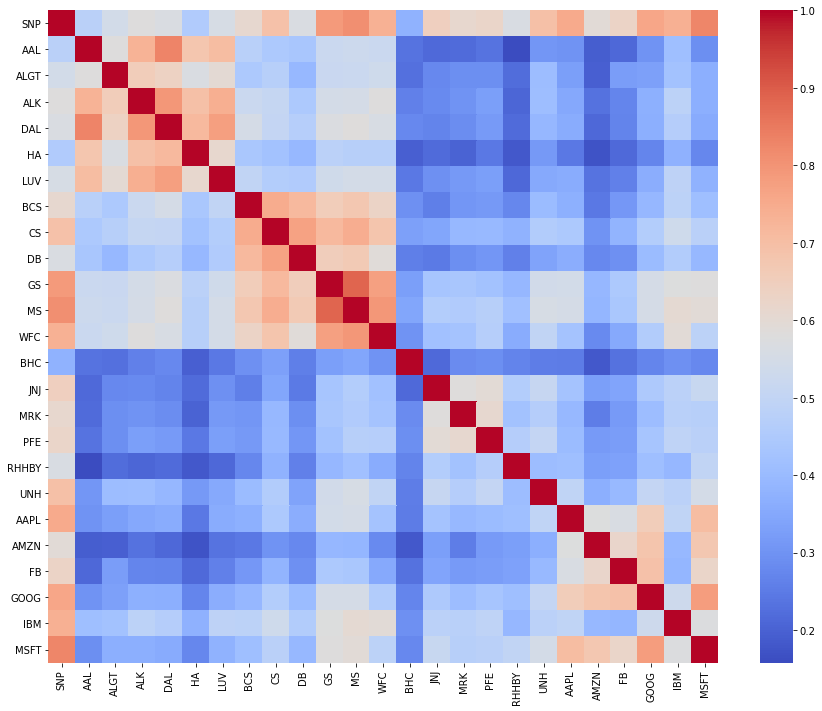

In [35]:
#Checking correlation
plt.figure(figsize=(15,12))
sns.heatmap(daily_returns.corr(),cmap='coolwarm')
plt.show()

#### There are a few stocks with correlation between them. But industrywise correlation would give better view

### Plotting Industrywise correlation

In [36]:
daily_returns_Aviation = daily_returns.iloc[:,1:7]
daily_returns_Finance = daily_returns.iloc[:,7:13]
daily_returns_Pharma = daily_returns.iloc[:,13:19]
daily_returns_Technology = daily_returns.iloc[:,19:25]

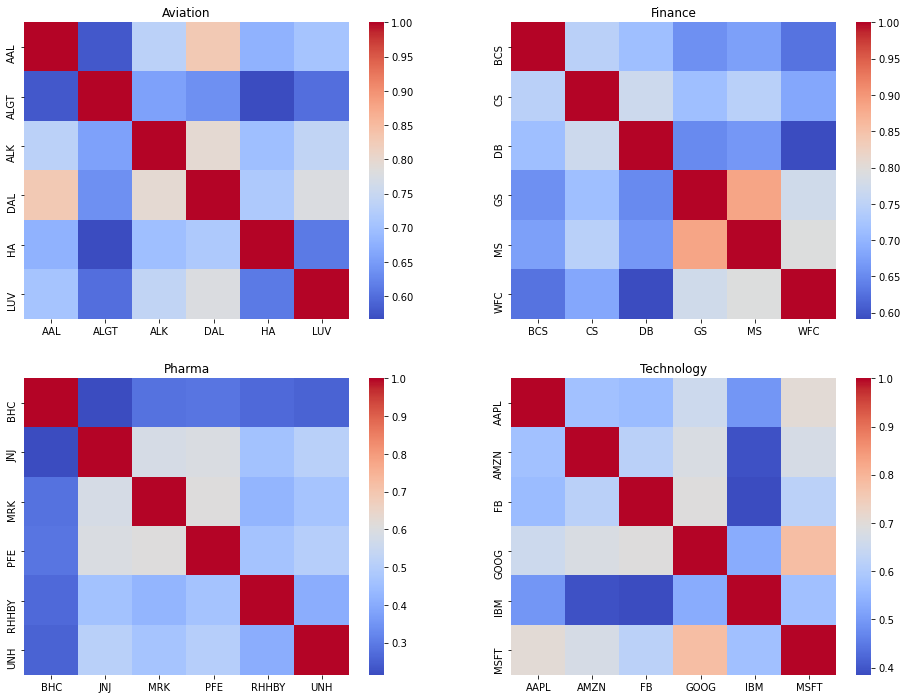

In [37]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(16,12))
sns.heatmap(daily_returns_Aviation.corr(), ax=ax1,cmap='coolwarm')
sns.heatmap(daily_returns_Finance.corr(), ax=ax2,cmap='coolwarm')
sns.heatmap(daily_returns_Pharma.corr(), ax=ax3,cmap='coolwarm')
sns.heatmap(daily_returns_Technology.corr(), ax=ax4,cmap='coolwarm')

ax1.title.set_text('Aviation')
ax2.title.set_text('Finance')
ax3.title.set_text('Pharma')
ax4.title.set_text('Technology')

plt.show()

#### DAL and AAL from Aviation are correlated highly. <br><br> GS and MS from Finance are correlated highly <br><br> GOOG and MSFT are correlated hightly <br><br> So we should consider avoiding taking them together for a portfolio to lower the risk

In [17]:
# Exporting the data to a csv to use in tableau
combined_data.to_csv(r'Combined_Data.csv')

## Conclusion

We selected Microsoft, Google, Merk & Co and Johnson & Johnson for **Mr. Partick Jyenger** which gives a cumulative return of 159.9%
at a cumulative risk of 24.0% 

we have the potential to generate 1.2 million dollars which meets Mr Patrick Jyenger’s requirement to double his investment of $500,000.

This meets the requirement to double his money at a resonable mid 20's risk.

---------------------
We selected Amazon, Microsoft, Apple and UNH for **Mr. Peter Jyenger** which gives a cumulative return of 341.6%
at a CAGR of 33.7%

We have the potential to generate 4.4 million dollars which will help in organic expansion of which can be used for expansion of JWW